# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
%pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

Note: you may need to restart the kernel to use updated packages.


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
weather_api_key

'4d1e643794fb9ddf2fba81aa9280855b'

In [5]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city +'&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | qamdo
Processing Record 3 of Set 1 | parras de la fuente
Processing Record 4 of Set 1 | bitkine
Processing Record 5 of Set 1 | susuman
Processing Record 6 of Set 1 | igarka
Processing Record 7 of Set 1 | abepura
Processing Record 8 of Set 1 | howrah
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | mizdah
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | sivasli
Processing Record 13 of Set 1 | tolanaro
Processing Record 14 of Set 1 | nikol'sk
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | utrik
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | sarangani
Processing Record 21 of Set 1 | sosnovyy bor
Processing Record 22 of Set 1 | puerto natales
Processi

Processing Record 38 of Set 4 | severnoye
Processing Record 39 of Set 4 | severo-yeniseyskiy
Processing Record 40 of Set 4 | muromtsevo
Processing Record 41 of Set 4 | iqaluit
Processing Record 42 of Set 4 | tabou
Processing Record 43 of Set 4 | la passe
Processing Record 44 of Set 4 | hamilton
Processing Record 45 of Set 4 | qarqaraly
Processing Record 46 of Set 4 | veshenskaya
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | praia da vitoria
Processing Record 49 of Set 4 | xai-xai
Processing Record 0 of Set 5 | tura
Processing Record 1 of Set 5 | yarmouth
Processing Record 2 of Set 5 | lebu
Processing Record 3 of Set 5 | buka
Processing Record 4 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 5 of Set 5 | kegeyli shahar
Processing Record 6 of Set 5 | jalai nur
Processing Record 7 of Set 5 | pierre
Processing Record 8 of Set 5 | crane
Processing Record 9 of Set 5 | richards bay
Processing Record 10 of Set 5 | adh dhibiyah
City not found. Sk

Processing Record 31 of Set 8 | haiku-pauwela
Processing Record 32 of Set 8 | timbuktu
Processing Record 33 of Set 8 | fortuna
Processing Record 34 of Set 8 | broome
Processing Record 35 of Set 8 | farmington
Processing Record 36 of Set 8 | choma
Processing Record 37 of Set 8 | horseheads
Processing Record 38 of Set 8 | skovorodino
Processing Record 39 of Set 8 | keelakarai
Processing Record 40 of Set 8 | fale old settlement
Processing Record 41 of Set 8 | marsh harbour
Processing Record 42 of Set 8 | xingcheng
Processing Record 43 of Set 8 | malabar
Processing Record 44 of Set 8 | bulungu
Processing Record 45 of Set 8 | la'ie
Processing Record 46 of Set 8 | midvagur
Processing Record 47 of Set 8 | alburquerque
Processing Record 48 of Set 8 | mikuni
Processing Record 49 of Set 8 | connellsville
Processing Record 0 of Set 9 | nieves
Processing Record 1 of Set 9 | kununurra
Processing Record 2 of Set 9 | mlada boleslav
Processing Record 3 of Set 9 | kolyvan'
Processing Record 4 of Set 9 

City not found. Skipping...
Processing Record 15 of Set 12 | isangel
Processing Record 16 of Set 12 | mogocha
Processing Record 17 of Set 12 | fort leonard wood
Processing Record 18 of Set 12 | amuntai
Processing Record 19 of Set 12 | celestun
Processing Record 20 of Set 12 | argo
Processing Record 21 of Set 12 | chokwe
Processing Record 22 of Set 12 | poronaysk
Processing Record 23 of Set 12 | magdagachi
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          543
Lat           543
Lng           543
Max Temp      543
Humidity      543
Cloudiness    543
Wind Speed    543
Country       543
Date          543
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,0.81,93,100,10.29,AR,1686528754
1,qamdo,31.1667,97.2333,2.83,85,100,1.83,CN,1686528754
2,parras de la fuente,25.4167,-102.1833,33.32,12,2,5.61,MX,1686528754
3,bitkine,11.9801,18.2138,28.52,60,70,2.36,TD,1686528754
4,susuman,62.7833,148.1667,22.39,36,49,6.08,RU,1686528754


In [8]:
#export city_data_df to csv file 
city_data_df.to_csv('../output_data/City_data.csv', index = True) 

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

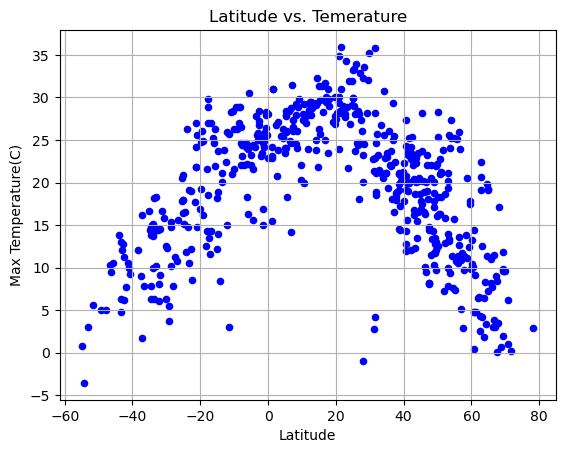

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
city_data_df.plot(x='Lat', y='Max Temp', kind = 'scatter',
                 marker='o', color ='b',xlabel='Latitude',ylabel='Max Temperature(C)',
                 title='Latitude vs. Temerature',grid=True,
                )

# Save the figure
plt.savefig("../output_data/Fig1.png")



#### Latitude Vs. Humidity

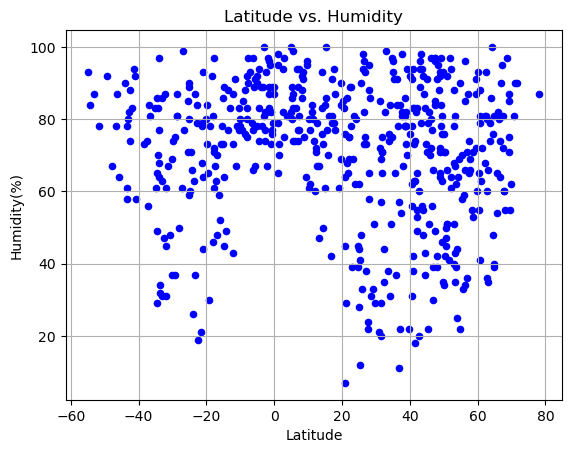

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(x='Lat', y='Humidity', kind = 'scatter',
                 marker='o', color ='b',xlabel='Latitude',ylabel='Humidity(%)',
                 title='Latitude vs. Humidity',grid=True,
                )


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

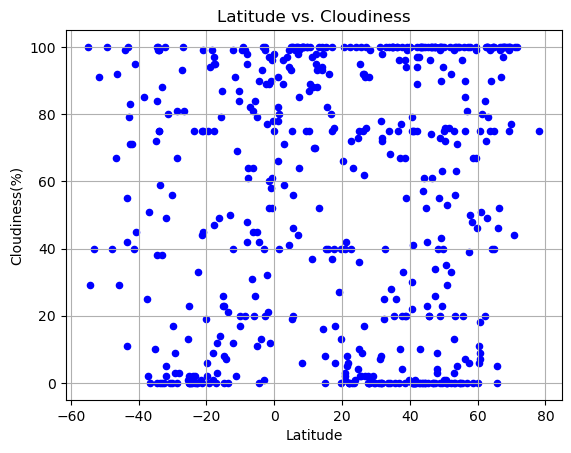

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(x='Lat', y='Cloudiness', kind = 'scatter',
                 marker='o', color ='b',xlabel='Latitude',ylabel='Cloudiness(%)',
                 title='Latitude vs. Cloudiness',grid=True,
                )

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

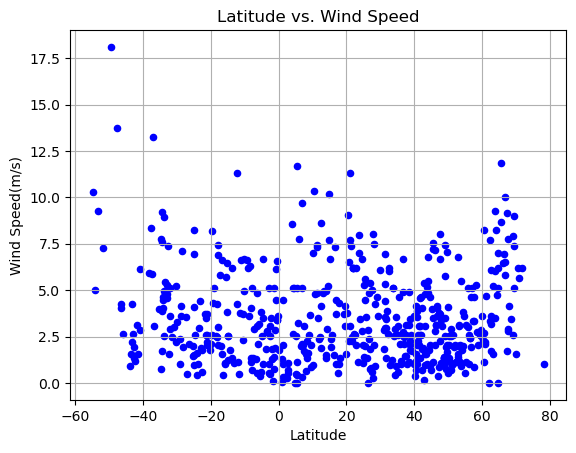

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(x='Lat', y='Wind Speed', kind = 'scatter',
                 marker='o', color ='b',xlabel='Latitude',ylabel='Wind Speed(m/s)',
                 title='Latitude vs. Wind Speed',grid=True,
                )

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

In [15]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,0.81,93,100,10.29,AR,1686528754
1,qamdo,31.1667,97.2333,2.83,85,100,1.83,CN,1686528754
2,parras de la fuente,25.4167,-102.1833,33.32,12,2,5.61,MX,1686528754
3,bitkine,11.9801,18.2138,28.52,60,70,2.36,TD,1686528754
4,susuman,62.7833,148.1667,22.39,36,49,6.08,RU,1686528754


In [20]:
city_data_df['Lat']


0     -54.8000
1      31.1667
2      25.4167
3      11.9801
4      62.7833
        ...   
538    20.8667
539    37.6333
540   -24.5333
541    49.2167
542    53.4500
Name: Lat, Length: 543, dtype: float64

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
#df.loc[df['shield'] > 6]
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,qamdo,31.1667,97.2333,2.83,85,100,1.83,CN,1686528754
2,parras de la fuente,25.4167,-102.1833,33.32,12,2,5.61,MX,1686528754
3,bitkine,11.9801,18.2138,28.52,60,70,2.36,TD,1686528754
4,susuman,62.7833,148.1667,22.39,36,49,6.08,RU,1686528754
5,igarka,67.4667,86.5833,8.47,72,100,9.15,RU,1686528754


In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE df.loc[df['shield'] > 6,
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,qamdo,31.1667,97.2333,2.83,85,100,1.83,CN,1686528754
2,parras de la fuente,25.4167,-102.1833,33.32,12,2,5.61,MX,1686528754
3,bitkine,11.9801,18.2138,28.52,60,70,2.36,TD,1686528754
4,susuman,62.7833,148.1667,22.39,36,49,6.08,RU,1686528754
5,igarka,67.4667,86.5833,8.47,72,100,9.15,RU,1686528754


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,0.81,93,100,10.29,AR,1686528754
6,abepura,-2.6333,140.5833,28.45,74,20,3.09,ID,1686528754
8,adamstown,-25.0660,-130.1015,20.87,59,23,6.96,PN,1686528502
12,tolanaro,-25.0319,46.9987,17.98,89,0,1.50,MG,1686528755
14,port elizabeth,-33.9180,25.5701,15.17,97,75,8.94,ZA,1686528528


###  Temperature vs. Latitude Linear Regression Plot

The r value is 0.5310185242142915


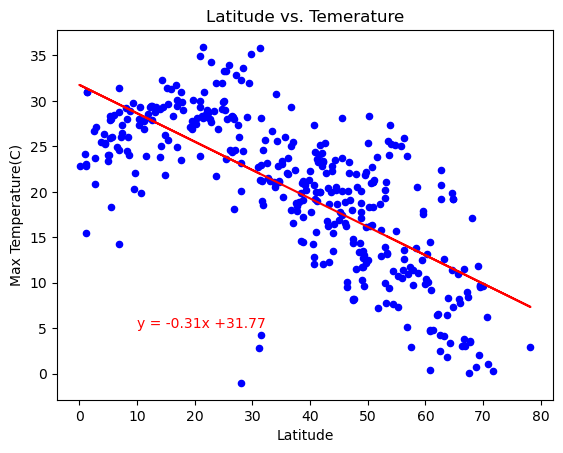

In [26]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot(x='Lat', y='Max Temp', kind = 'scatter',
                 marker='o', color ='b',xlabel='Latitude',ylabel='Max Temperature(C)',
                 title='Latitude vs. Temerature'
                )
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,color='r')
plt.annotate(line_eq,(10,5),fontsize=10,color="r")
print(f"The r value is {rvalue**2}")

The r value is 0.611545606914264


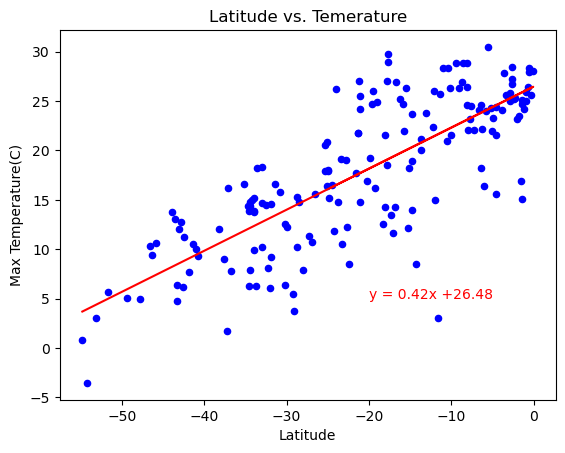

In [27]:
southern_hemi_df.plot(x='Lat', y='Max Temp', kind = 'scatter',
                 marker='o', color ='b',xlabel='Latitude',ylabel='Max Temperature(C)',
                 title='Latitude vs. Temerature'
                )
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,color='r')
plt.annotate(line_eq,(-20,5),fontsize=10,color="r")
print(f"The r value is {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r value is 0.019787921486989362


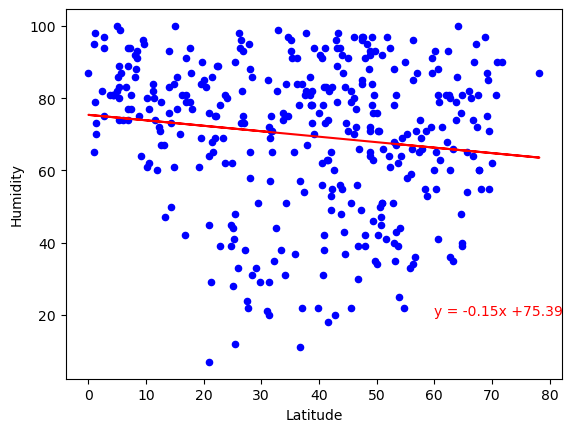

In [28]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot(x='Lat', y='Humidity', kind = 'scatter',
                 marker='o', color ='b',xlabel='Latitude',ylabel='Humidity'
                )
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,color='r')
plt.annotate(line_eq,(60,20),fontsize=10,color="r")
print(f"The r value is {rvalue**2}")

The r value is 0.04809200397193079


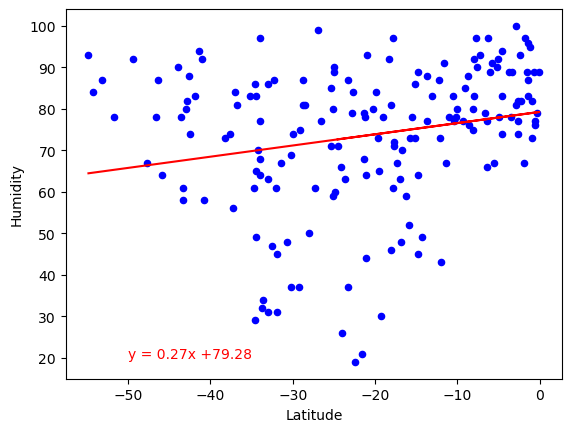

In [29]:
# Southern Hemisphere
southern_hemi_df.plot(x='Lat', y='Humidity', kind = 'scatter',
                 marker='o', color ='b',xlabel='Latitude',ylabel='Humidity'
                )
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,color='r')
plt.annotate(line_eq,(-50,20),fontsize=10,color="r")
print(f"The r value is {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r value is 0.0009343142433771489


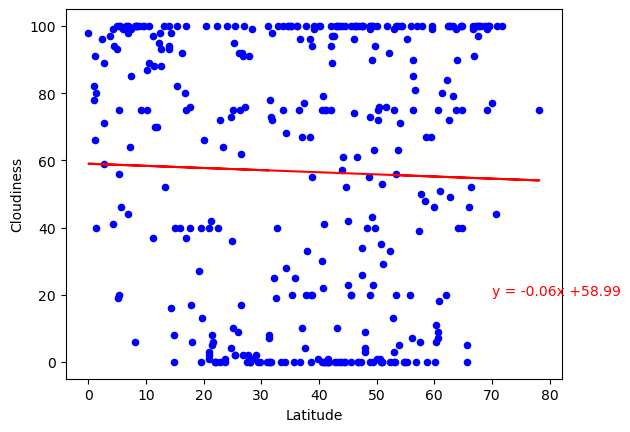

In [32]:
# Northern Hemisphere
northern_hemi_df.plot(x='Lat', y='Cloudiness', kind = 'scatter',
                 marker='o', color ='b',xlabel='Latitude',ylabel='Cloudiness'             
                )
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,color='r')
plt.annotate(line_eq,(70,20),fontsize=10,color="r")
print(f"The r value is {rvalue**2}")

The r value is 0.0004895042344074605


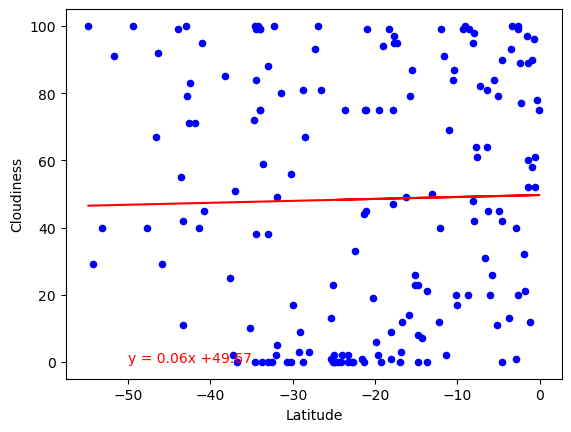

In [33]:
# Southern Hemisphere
southern_hemi_df.plot(x='Lat', y='Cloudiness', kind = 'scatter',
                 marker='o', color ='b',xlabel='Latitude',ylabel='Cloudiness'             
                )
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,color='r')
plt.annotate(line_eq,(-50,0),fontsize=10,color="r")
print(f"The r value is {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r value is 0.00414097886101144


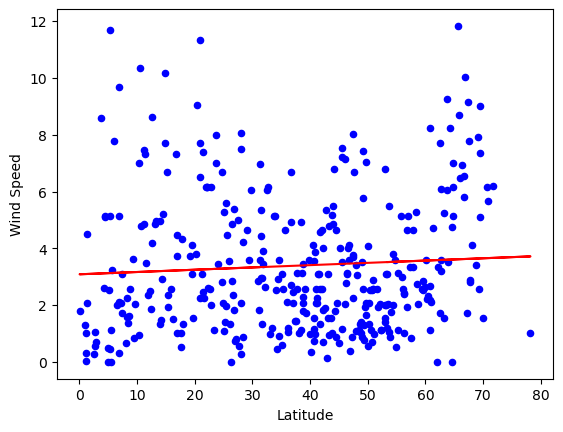

In [34]:
# Northern Hemisphere
northern_hemi_df.plot(x='Lat', y='Wind Speed', kind = 'scatter',
                 marker='o', color ='b',xlabel='Latitude',ylabel='Wind Speed'             
                )
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,color='r')
plt.annotate(line_eq,(10,20),fontsize=10,color="r")
print(f"The r value is {rvalue**2}")

The r value is 0.09236777834932763


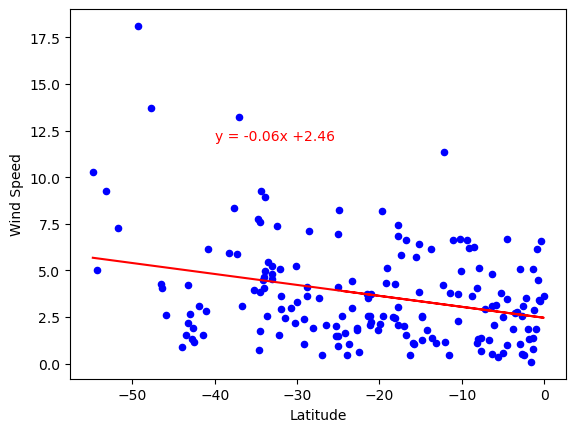

In [35]:
southern_hemi_df.plot(x='Lat', y='Wind Speed', kind = 'scatter',
                 marker='o', color ='b',xlabel='Latitude',ylabel='Wind Speed'             
                )
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,color='r')
plt.annotate(line_eq,(-40,12),fontsize=10,color="r")
print(f"The r value is {rvalue**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE